## Predict the protein location in an image

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)     
warnings.filterwarnings("ignore", category=FutureWarning)

# load the class to run prediction
from protein_location_prediction import predict_protein_location


In [2]:
def multi_image_predictions(filename_list, path_to_image_files, model_dir, min_probability_threshold):
    """ given a list of filenames (without ending), 
    loop through and predict each images protein location"""
    count = 0
    prot_predicts_list = []
    for ifnames in filename_list:       
        prot_predicts = predict_protein_location(path_to_image_files, ifnames, model_dir, min_probability_threshold)
        prot_predicts.run_prediction()
        # combine pandas dataframes by making each image a column in the data frame
        if count == 0:
            all_predictions_df = prot_predicts.predictions_df.rename(columns={'prediction_probability': ifnames})
        else:
            all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]
        count = count+1
        print('Image number ', count)
        prot_predicts_list.append(prot_predicts)

    ## --- make y_pred dataframe --- ##
    # transpose to images are rows, columns are locations
    y_pred_df = all_predictions_df.drop(['protein_location_names','protein_location'], axis=1).T.reset_index(drop=True)

    # find maximum threshold to always have a prediction
    new_prob_threshold = y_pred_df.max(axis=0).min()
    if new_prob_threshold > min_probability_threshold: 
        min_probability_threshold = new_prob_threshold
        print('New probability threshold: ', min_probability_threshold)
    else:
        print('Kept min. probability threshold: ', min_probability_threshold)
    # now set to 1 or 0 if above or below threshold
    y_pred_df[y_pred_df>=min_probability_threshold] = 1 # if location was detected
    y_pred_df[y_pred_df<min_probability_threshold] = 0 # if not detected

    ## --- return results as DataFrame --- ##
    return all_predictions_df, y_pred_df, prot_predicts_list

def fill_targets(row):
    """
    Modify the array with all labels in the target in a hot encoding format  

    Parameter
    ---------
    row: series
        row of the target DataFrame with all labels as an array

    Returns
    ---------
    row: series
        modified row of the target DataFrame in a hot encoding format
    """
    #row.Target = np.array(row.Target.split(",")).astype(np.int)
    for num in row.Target:
        name = prot_predicts.label_names[int(num)]
        row.loc[name] = 1
    return row


## Run prediction for 1 image

In [2]:
## --- USER INPUT --- ##
path_to_image_files = '../data/train_select/'
model_dir = '../models/'
probability_threshold = 0.55 # cutoff to determine protein location
image_file_name = '0a9a8b6a-bbab-11e8-b2ba-ac1f6b6435d0' # without e.g. '_green.png'

## --- PREDICT --- ##
prot_predicts = predict_protein_location(path_to_image_files, image_file_name, model_dir, probability_threshold)
prot_predicts.run_prediction()

## --- View results as DataFrame -- ##
display(prot_predicts.predictions_df)
prot_predicts.predicted_locations

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-15 16:44:30.501643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 16:44:30.501898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-15 16:44:31.628534: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 16:44:32.045625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


,protein_location_names,protein_location,prediction_probability
0,Nucleoplasm,0,0.531258
1,Nuclear membrane,1,0.614223
2,Nucleoli,2,0.486372
3,Nucleoli fibrillar center,3,0.520848
4,Nuclear speckles,4,0.518600
5,Nuclear bodies,5,0.516668
6,Endoplasmic reticulum,6,0.546767
7,Golgi apparatus,7,0.469711
8,Peroxisomes,8,0.505298
9,Endosomes,9,0.427321


array([10,  1])

## Predict all images used in the baseline model

In [4]:
## --- USER INPUT --- ##
path_to_image_files = '../data/train/'
model_dir = '../models/'
probability_threshold = 0.51 # cutoff to determine protein location
#image_file_name = '0a9a8b6a-bbab-11e8-b2ba-ac1f6b6435d0' # without e.g. '_green.png'

# load the image names
import pandas as pd
df_base_im = pd.read_csv('../data/baseline_images.csv')

baseline_probabilities_df, baseline_ypred_df, prot_predicts = multi_image_predictions(df_base_im.Id.to_list(), path_to_image_files, model_dir, 
                                                                        probability_threshold)


2022-07-15 16:44:38.345002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  1


2022-07-15 16:44:41.689864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  2


2022-07-15 16:44:44.692369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  3


2022-07-15 16:44:48.102682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  4


2022-07-15 16:44:51.680605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  5


2022-07-15 16:44:54.687940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  6


2022-07-15 16:44:58.326173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  7


2022-07-15 16:45:01.437300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  8


2022-07-15 16:45:04.826575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  9


2022-07-15 16:45:08.257507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  10


2022-07-15 16:45:11.546382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  11


2022-07-15 16:45:15.230172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  12


2022-07-15 16:45:18.935333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  13


2022-07-15 16:45:22.295222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  14


2022-07-15 16:45:26.241057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  15


2022-07-15 16:45:29.596907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  16


2022-07-15 16:45:33.292244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  17


2022-07-15 16:45:37.046861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  18


2022-07-15 16:45:40.577428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  19


2022-07-15 16:45:44.962078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  20


2022-07-15 16:45:48.845532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  21


2022-07-15 16:45:53.687459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  22


2022-07-15 16:45:58.821883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  23


2022-07-15 16:46:02.777584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  24


2022-07-15 16:46:07.652763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  25


2022-07-15 16:46:12.601333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  26


2022-07-15 16:46:16.968107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  27


2022-07-15 16:46:22.146287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  28


2022-07-15 16:46:26.569185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  29


2022-07-15 16:46:34.493629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  30


2022-07-15 16:46:40.136869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  31


2022-07-15 16:46:45.404233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  32


2022-07-15 16:46:50.525703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  33


2022-07-15 16:46:55.306817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  34


2022-07-15 16:46:59.291918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  35


2022-07-15 16:47:04.111829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  36


2022-07-15 16:47:08.972557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  37


2022-07-15 16:47:13.627449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  38


2022-07-15 16:47:19.584515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  39


2022-07-15 16:47:23.955574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  40


2022-07-15 16:47:30.255533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  41


2022-07-15 16:47:36.683783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  42


2022-07-15 16:47:42.752319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  43


2022-07-15 16:47:48.583609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  44


2022-07-15 16:47:54.198311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  45


2022-07-15 16:48:01.327154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  46


2022-07-15 16:48:06.847086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  47


2022-07-15 16:48:11.278945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  48


2022-07-15 16:48:17.836702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  49


2022-07-15 16:48:23.730257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  50


2022-07-15 16:48:30.370547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Image number  51


2022-07-15 16:48:35.559307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  52


2022-07-15 16:48:39.919318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
Image number  53


2022-07-15 16:48:46.122341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  54


2022-07-15 16:48:51.731078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  55


2022-07-15 16:48:58.424160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  56


2022-07-15 16:49:05.019797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  57


2022-07-15 16:49:12.144085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  58


2022-07-15 16:49:21.312651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  59


2022-07-15 16:49:29.809097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step
Image number  60


2022-07-15 16:49:36.759002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  61


2022-07-15 16:49:44.073909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  62


2022-07-15 16:49:50.519059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  63


2022-07-15 16:49:57.792573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
Image number  64


2022-07-15 16:50:06.202107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step
Image number  65


2022-07-15 16:50:13.701547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  66


2022-07-15 16:50:23.346864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  67


2022-07-15 16:50:32.188589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 7s 7s/step
Image number  68


2022-07-15 16:50:41.670232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  69


2022-07-15 16:50:49.996939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step
Image number  70


2022-07-15 16:50:57.673071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
Image number  71


2022-07-15 16:51:13.689724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step
Image number  72


2022-07-15 16:51:29.626918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 7s 7s/step
Image number  73


2022-07-15 16:51:38.955116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step
Image number  74


2022-07-15 16:51:52.377736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step
Image number  75


2022-07-15 16:52:03.680156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 11s 11s/step
Image number  76


2022-07-15 16:52:29.213408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step
Image number  77


2022-07-15 16:52:46.882759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 19s 19s/step
Image number  78


2022-07-15 16:53:10.018294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step
Image number  79


2022-07-15 16:53:23.783725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step
Image number  80


2022-07-15 16:53:47.735777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 16s 16s/step
Image number  81


2022-07-15 16:53:59.592666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 7s 7s/step
Image number  82


2022-07-15 16:54:11.718283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step
Image number  83


2022-07-15 16:54:23.128404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step
Image number  84


2022-07-15 16:54:35.666926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step
Image number  85


2022-07-15 16:54:54.984284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 17s 17s/step
Image number  86


2022-07-15 16:55:09.843176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step
Image number  87


2022-07-15 16:55:29.563881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step
Image number  88


2022-07-15 16:55:41.463769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step
Image number  89


2022-07-15 16:55:53.158629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step
Image number  90


2022-07-15 16:56:06.841965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step
Image number  91


2022-07-15 16:56:22.577015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 15s 15s/step
Image number  92


2022-07-15 16:56:45.575674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step
Image number  93


2022-07-15 16:56:56.056997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step
Image number  94


2022-07-15 16:57:08.095560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 20s 20s/step
Image number  95


2022-07-15 16:57:41.192989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step
Image number  96


2022-07-15 16:57:54.303839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 16s 16s/step
Image number  97


2022-07-15 16:58:20.242388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 8s 8s/step
Image number  98


2022-07-15 16:58:36.666387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  99


2022-07-15 16:58:55.053924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  100


2022-07-15 16:59:14.402143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  101


2022-07-15 16:59:34.952676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  102


2022-07-15 16:59:46.972916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  103


2022-07-15 17:00:04.212952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 19s 19s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  104


2022-07-15 17:00:21.246865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  105


2022-07-15 17:00:34.909370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  106


2022-07-15 17:00:48.858704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  107


2022-07-15 17:01:03.265938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  108


2022-07-15 17:01:18.346268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  109


2022-07-15 17:01:30.705074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  110


2022-07-15 17:01:48.367195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 20s 20s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  111


2022-07-15 17:02:17.235640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  112


2022-07-15 17:02:34.889326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  113


2022-07-15 17:02:55.241433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  114


2022-07-15 17:03:09.901213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  115


2022-07-15 17:03:24.700171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  116


2022-07-15 17:03:49.099245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  117


2022-07-15 17:04:02.826901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  118


2022-07-15 17:04:35.001203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  119


2022-07-15 17:04:53.565860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  120


2022-07-15 17:05:07.979560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  121


2022-07-15 17:05:27.028019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 16s 16s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  122


2022-07-15 17:05:45.143796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 11s 11s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  123


2022-07-15 17:06:00.541771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  124


2022-07-15 17:06:14.946728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 15s 15s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  125


2022-07-15 17:06:31.234929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 11s 11s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  126


2022-07-15 17:06:47.724597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  127


2022-07-15 17:07:05.691386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  128


2022-07-15 17:07:20.305907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 11s 11s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  129


2022-07-15 17:07:38.457123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  130


2022-07-15 17:07:52.110020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  131


2022-07-15 17:08:14.147306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  132


2022-07-15 17:08:33.694673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  133


2022-07-15 17:08:46.525378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 11s 11s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  134


2022-07-15 17:09:03.261345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  135


2022-07-15 17:09:22.047633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 17s 17s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  136


2022-07-15 17:09:40.595444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 10s 10s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  137


2022-07-15 17:10:26.959020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 47s 47s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  138


2022-07-15 17:10:47.359025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  139


2022-07-15 17:11:15.266590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 48s 48s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  140


2022-07-15 17:12:29.806736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 33s 33s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  141


2022-07-15 17:12:49.544449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 24s 24s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  142


2022-07-15 17:13:23.567392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  143


2022-07-15 17:13:48.664159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 24s 24s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  144


2022-07-15 17:14:15.259903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 24s 24s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  145


2022-07-15 17:14:54.707438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 34s 34s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  146


2022-07-15 17:15:28.608217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 32s 32s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  147


2022-07-15 17:16:11.372679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  148


2022-07-15 17:16:37.913993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  149


2022-07-15 17:16:54.348433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  150


2022-07-15 17:17:24.986639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 34s 34s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  151


2022-07-15 17:17:48.859706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  152


2022-07-15 17:18:05.478388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 11s 11s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  153


2022-07-15 17:18:20.441579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  154


2022-07-15 17:18:35.761106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 22s 22s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  155


2022-07-15 17:19:13.302379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 25s 25s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  156


2022-07-15 17:19:36.142927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 14s 14s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  157


2022-07-15 17:19:55.213294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  158


2022-07-15 17:20:16.238070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 24s 24s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  159


2022-07-15 17:20:37.866389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  160


2022-07-15 17:21:06.977132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  161


2022-07-15 17:21:24.274678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  162


2022-07-15 17:21:38.039176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 12s 12s/step


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


Image number  163


2022-07-15 17:21:54.810338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step
Image number  164
New probability threshold:  0.551471784591988


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/3095365943.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_predictions_df[ifnames] = prot_predicts.predictions_df[['prediction_probability']]


In [5]:
## --- getting y_train for baseline --- ##
import numpy as np
from plot_classes import OrderLabels, ConfusionErrorMetrics, MulticlassPlots

# get the labels for the images used in the baseline model
train_base_labels = pd.read_csv('../data/baseline_images.csv')
# get the right column name
train_base_labels.rename(columns = {'Guess':'Target'}, inplace = True)
# fixing any whitespace
train_base_labels = train_base_labels.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
order_doer = OrderLabels(target_labels=train_base_labels)
order_doer.ordered_dataframe()
train_base_labels.rename(columns = {'Target':'target_v', 'target_list':'Target'}, inplace = True)

# target dataframe
targets = train_base_labels[['Target', 'Id']]
# add column for each protein and set to 0
for key in prot_predicts.label_names.keys():
    targets[prot_predicts.label_names[key]] = 0
# for each target value, set corresponding column = 1
targets = targets.apply(fill_targets, axis=1)
baseline_y_train_df = targets.drop(['Id', 'Target'], axis=1)


/var/folders/vn/y7lprnhs06j1j5w4cj9t64080000gn/T/ipykernel_56376/2589585450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets[prot_predicts.label_names[key]] = 0


/Users/ryan/neue_fische/human-protein-atlas-image-classification/notebooks/plot_classes.py:199: RuntimeWarning: invalid value encountered in divide
  recall = self.tp / (self.tp + self.fn)


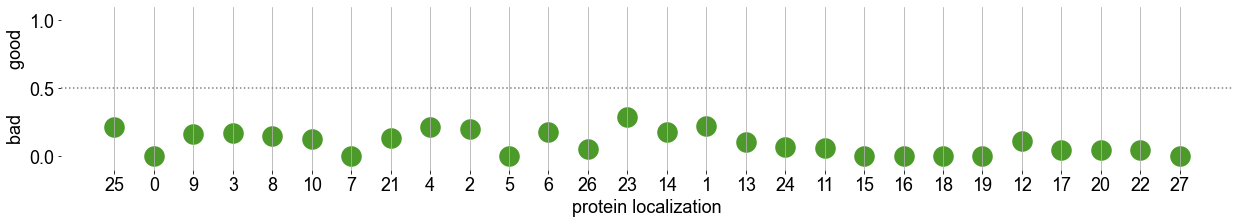

In [6]:
# calculate and plot f1 score of predictions

metrics = ConfusionErrorMetrics(order_doer.df_order, y_test=baseline_y_train_df, y_pred=baseline_ypred_df)
metrics.metrics_names_and_order()

metr_plot= MulticlassPlots(metrics.df_metrics_o)
metr_plot.plot_f1_score()


In [7]:
metrics.df_metrics_o

,recall,precision,f1,accuracy,TP,FP,FN,TN,occurence_order,key,Loc,count
1,0.000000,0.000000,0.000000,0.756098,0,1,39,124,1,0,Nucleoplasm,39
15,0.600000,0.136364,0.222222,0.871951,3,19,2,140,15,1,Nuclear membrane,5
9,0.166667,0.250000,0.200000,0.951220,1,3,5,155,9,2,Nucleoli,6
3,0.266667,0.125000,0.170213,0.762195,4,28,11,121,3,3,Nucleoli fibrillar center,15
8,0.375000,0.150000,0.214286,0.865854,3,17,5,139,8,4,Nuclear speckles,8
10,0.000000,0.000000,0.000000,0.920732,0,7,6,151,10,5,Nuclear bodies,6
11,0.500000,0.111111,0.181818,0.835366,3,24,3,134,11,6,Endoplasmic reticulum,6
6,0.000000,0.000000,0.000000,0.932927,0,1,10,153,6,7,Golgi apparatus,10
4,0.285714,0.102564,0.150943,0.725610,4,35,10,115,4,8,Peroxisomes,14
2,0.375000,0.107143,0.166667,0.634146,6,50,10,98,2,9,Endosomes,16


## Run prediction on files in a directory, randomly select 6, plot and compare prediction with target

In [3]:
## --- USER INPUT --- ##
path_to_image_files = '../data/train/'
model_dir = '../models/'
probability_threshold = 0.5 # cutoff to determine protein location
#image_file_name = '0a9a8b6a-bbab-11e8-b2ba-ac1f6b6435d0' # without e.g. '_green.png'

## --- PREDICT --- ##
import glob
import pandas as pd
import random
image_file_names = random.sample([f.split('_')[-2].split('/')[-1] for f in glob.glob(path_to_image_files+'*.png')], 3)
baseline_probabilities_df, baseline_ypred_df, prot_predicts_list = multi_image_predictions(image_file_names, path_to_image_files, model_dir, 
                                                                        probability_threshold)

# get the labels for the images
train_labels = pd.read_csv('../data/train.csv')


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-18 14:18:17.910655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-18 14:18:17.910744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-18 14:18:18.885527: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-18 14:18:19.297209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  1


2022-07-18 14:18:22.916539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  2


2022-07-18 14:18:26.310897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Image number  3
Kept min. probability threshold:  0.5


In [23]:
((20/4)*32000)/(60*60), (4*60)/(((20/4)*164)/(60))

(44.44444444444444, 17.5609756097561)

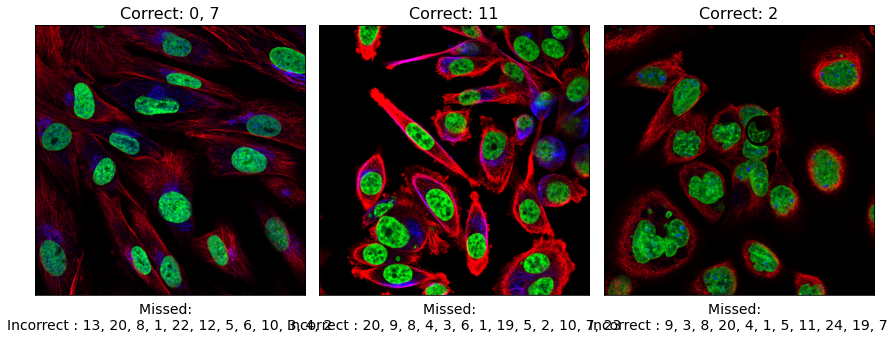

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,12))
axs = axs.ravel()

for i in range(len(prot_predicts_list)):
    predict_protein_location.plot_predicted_images(prot_predicts_list[i],train_labels, axs[i])
plt.tight_layout()


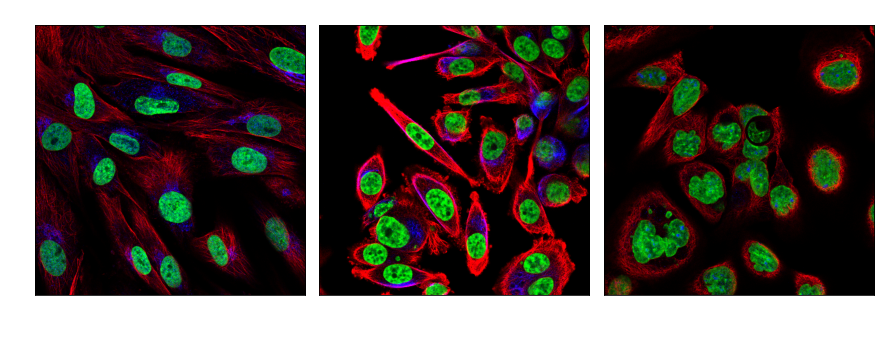

In [6]:
# with white font for presentation
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,12))
axs = axs.ravel()

for i in range(len(prot_predicts_list)):
    predict_protein_location.plot_predicted_images(prot_predicts_list[i],train_labels, axs[i], fcolor='white')
plt.tight_layout()
